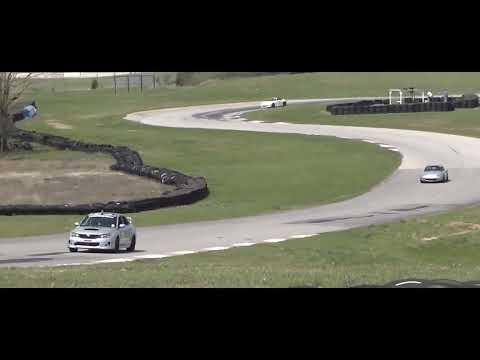

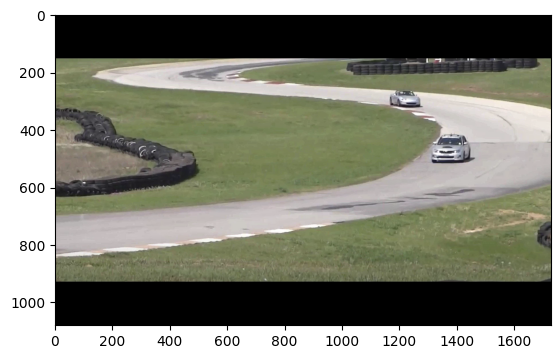

In [2]:
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

source = r'C:\Users\Work\Documents\projects\opencv-bootcamp\video-writing\race_car.mp4'

video_cap = cv2.VideoCapture(source)

if not video_cap.isOpened():
    print('Error opening video stream or file')

ret, frame = video_cap.read()
# Reversing the colour channels from BGR to RGB with frame[..., ::-1]
plt.imshow(frame[..., ::-1])
video = YouTubeVideo('RwxVEjv78LQ', width=700, height=438)
display(video)

plt.show()

In [4]:
## Write Video ##
# VideoWriter object = cv.VideoWriter(filename, fourcc, fps, frameSize )
# filename: the file, fourcc: 4 character code use to compress the frames in formats such as MPEG, fps: framerate, frameSize: size of the video frames

# Creating VideoWriter object, going to get the original frame size to use in the creation
frame_width = int(video_cap.get(3)) # or frame_width = int(video_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video_cap.get(4)) # or frame_height = int(video_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create two VideoWriter object one in avi format and one in mp4 format, 10 fps
out_avi = cv2.VideoWriter(r'C:\Users\Work\Documents\projects\opencv-bootcamp\video-writing\race_car_out.avi', cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'), 10, (frame_width, frame_height))
out_mp4 = cv2.VideoWriter(r'C:\Users\Work\Documents\projects\opencv-bootcamp\video-writing\race_car_out.mp4', cv2.VideoWriter_fourcc(*'XVID'), 10, (frame_width, frame_height))

# Now read the frames of the video capture and write them to each video object

while video_cap.isOpened():
    # ret is bool if frame was read, frame is actual frame
    ret, frame = video_cap.read()
    # if frame was read write it to the new files
    if ret:
        # Write the frame to the output files
        out_avi.write(frame)
        out_mp4.write(frame)
    else:
        break

# Releasing the videos meaning closing or stopping the video capture
video_cap.release()
out_avi.release()
out_mp4.release()

# Converted video encoding of mp4 file from XVID to h264 because HTML 5 can properly render videos with H264 encoding while OpenCV can't
# Ran: ffmpeg -y -i 'C:\Users\Work\Documents\projects\opencv-bootcamp\video-writing\race_car_out.mp4' -c:v libx264 'C:\Users\Work\Documents\projects\opencv-bootcamp\video-writing\race_car_out_x264.mp4'  -hide_banner -loglevel error

# Displaying with HTML5, should be same as the original but different video encoding to be compatible
mp4 = open(r'C:\Users\Work\Documents\projects\opencv-bootcamp\video-writing\race_car_out_x264.mp4', 'rb').read()
data_url = 'data:video/mp4;base64,' + b64encode(mp4).decode()

HTML(f'''<video width=700 controls><source src='{data_url}' type='video/mp4'></video>''')